#HW7 Planning and Learning


##environment
The grid world size is 10*5 like following, black color and edge represent walls, every transition get reward = -10.
After 200 episodes, the part of wall will collapse.

parameters:

discounted rate = 1.0

learning rate = 0.1

epsilon = 0.001

total_episode = 1000

planning_times = 5

In [1]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.001
WORLD_SIZE = [5,10]
S0 = [0, 0]
ST = [4, 0]
max_episode=1000
planning_times = 5
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

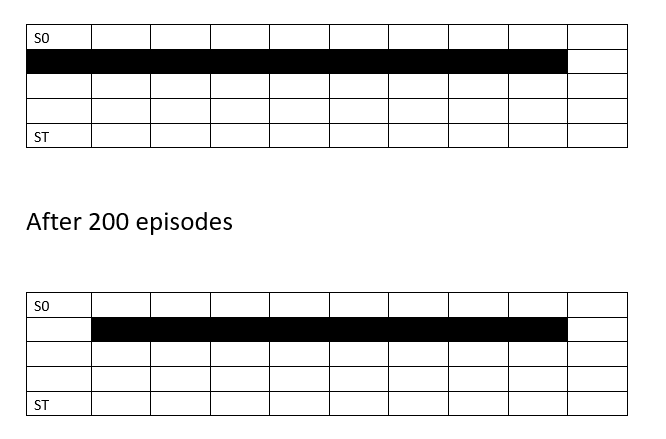

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict


In [3]:
# Environment
def step(state, action, epi):
  WALL = [[1,i]for i in range(9)]
  if epi > max_episode*0.2:
      WALL =  [[1,i]for i in range(1,9)]
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -10
  return [state_n, reward]

In [4]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [5]:
def dyna_q():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    for episode in range(max_episode):
        #### your code here ######
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action = chooseAction(state,qtable,epsilon)
            next_state, reward = step(state, ACTIONS[action], episode)
            qtable[state[0]][state[1]][action] = qtable[state[0]][state[1]][action] + ALPHA*(reward + GAMMA * np.max(qtable[next_state[0]][next_state[1]]) - qtable[state[0]][state[1]][action])
            model[(state[0],state[1])][action] = [reward , (next_state[0],next_state[1])] 
            for k in range(planning_times):
              model_s = list(model)[rd.randint(len(list(model)))]
              model_a = rd.choice(list(model[model_s].keys()))
              model_reward,model_n_state = model[model_s][model_a]
              qtable[model_s[0]][model_s[1]][model_a] = qtable[model_s[0]][model_s[1]][model_a] + ALPHA*(model_reward + GAMMA * np.max(qtable[model_n_state[0]][model_n_state[1]]) - qtable[model_s[0]][model_s[1]][model_a])
              #print(k)
            state = next_state
            G += reward
        returns.append(G)
        ##########################

    return returns

In [6]:
# use kappa = 0.1
def dyna_q_plus():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    t_table = np.zeros([5, 10, 4])
    t = 0
    kappa = 0.1
    #t在每個epsiode持續累積，越新的episode就會有越大的kappa*sqrt(tau)，也就是越大的return權重
    for episode in range(max_episode):
        #### your code here ####
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action = chooseAction(state,qtable,epsilon)
            next_state, reward = step(state, ACTIONS[action], episode)
            qtable[state[0]][state[1]][action] = qtable[state[0]][state[1]][action] + ALPHA*(reward + GAMMA * np.max(qtable[next_state[0]][next_state[1]]) - qtable[state[0]][state[1]][action])
            model[(state[0],state[1])][action] = [reward , (next_state[0],next_state[1])]
            t_table[state[0],state[1],action]=t 
            for k in range(planning_times):
              model_s = list(model)[rd.randint(len(list(model)))]
              model_a = rd.randint(0,4)
              #學習沒走過的新資訊
              if model_a not in list(model[model_s].keys()):
                model_reward = 0
                model_n_state = model_s
              else:
                model_reward,model_n_state = model[model_s][model_a]
              tau = t - t_table[model_s[0]][model_s[1]][model_a]
              model_reward += kappa*(tau**0.5) 
              qtable[model_s[0]][model_s[1]][model_a] = qtable[model_s[0]][model_s[1]][model_a] + ALPHA*(model_reward + GAMMA * np.max(qtable[model_n_state[0]][model_n_state[1]]) - qtable[model_s[0]][model_s[1]][model_a])

            state = next_state
            G += reward
            t += 1
        returns.append(G)
        #print(episode)
        ##########################

    return returns

In [15]:
# use kappa = 0.1
def dyna_q_plus_2():
    qtable = np.zeros([5, 10, 4])
    model = defaultdict(dict)
    returns = []
    kappa = 0.1
    #t在每個epsiode持續累積，越新的episode就會有越大的kappa*sqrt(tau)，也就是越大的return權重
    for episode in range(max_episode):
        #### your code here ####
        epsilon = EPSILON
        state = S0
        t_table = np.zeros([5, 10, 4])
        G = 0
        t = 0
        while state != ST:
            action = chooseAction(state,qtable,epsilon)
            next_state, reward = step(state, ACTIONS[action], episode)
            qtable[state[0]][state[1]][action] = qtable[state[0]][state[1]][action] + ALPHA*(reward + GAMMA * np.max(qtable[next_state[0]][next_state[1]]) - qtable[state[0]][state[1]][action])
            model[(state[0],state[1])][action] = [reward , (next_state[0],next_state[1])]
            t_table[state[0],state[1],action]=t 
            for k in range(planning_times):
              model_s = list(model)[rd.randint(len(list(model)))]
              model_a = rd.randint(0,4)
              #學習沒走過的新資訊
              if model_a not in list(model[model_s].keys()):
                model_reward = 0
                model_n_state = model_s
              else:
                model_reward,model_n_state = model[model_s][model_a]
              tau = t - t_table[model_s[0]][model_s[1]][model_a]
              model_reward += kappa*(tau**0.5) 
              qtable[model_s[0]][model_s[1]][model_a] = qtable[model_s[0]][model_s[1]][model_a] + ALPHA*(model_reward + GAMMA * np.max(qtable[model_n_state[0]][model_n_state[1]]) - qtable[model_s[0]][model_s[1]][model_a])

            state = next_state
            G += reward
            t += 1
        returns.append(G)
        #print(episode)
        ##########################

    return returns

In [7]:
def q_learning():
    qtable = np.zeros([5, 10, 4])
    returns = []
    for episode in range(max_episode):
        epsilon = EPSILON
        state = S0

        G = 0
        while state != ST:
            action = chooseAction(state, qtable, epsilon)
            state_n, reward = step(state, ACTIONS[action], episode)

            qtable[state[0], state[1], action] += ALPHA * (
                        reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])

            state = state_n
            G += reward
        returns.append(G)

    return returns

# Experiment 1 (20%)
In dyna-Q+ algorithm line20 ,$\tau$ need to restart in every episode or restart in every simulation?please do the experiment and explain your answer.


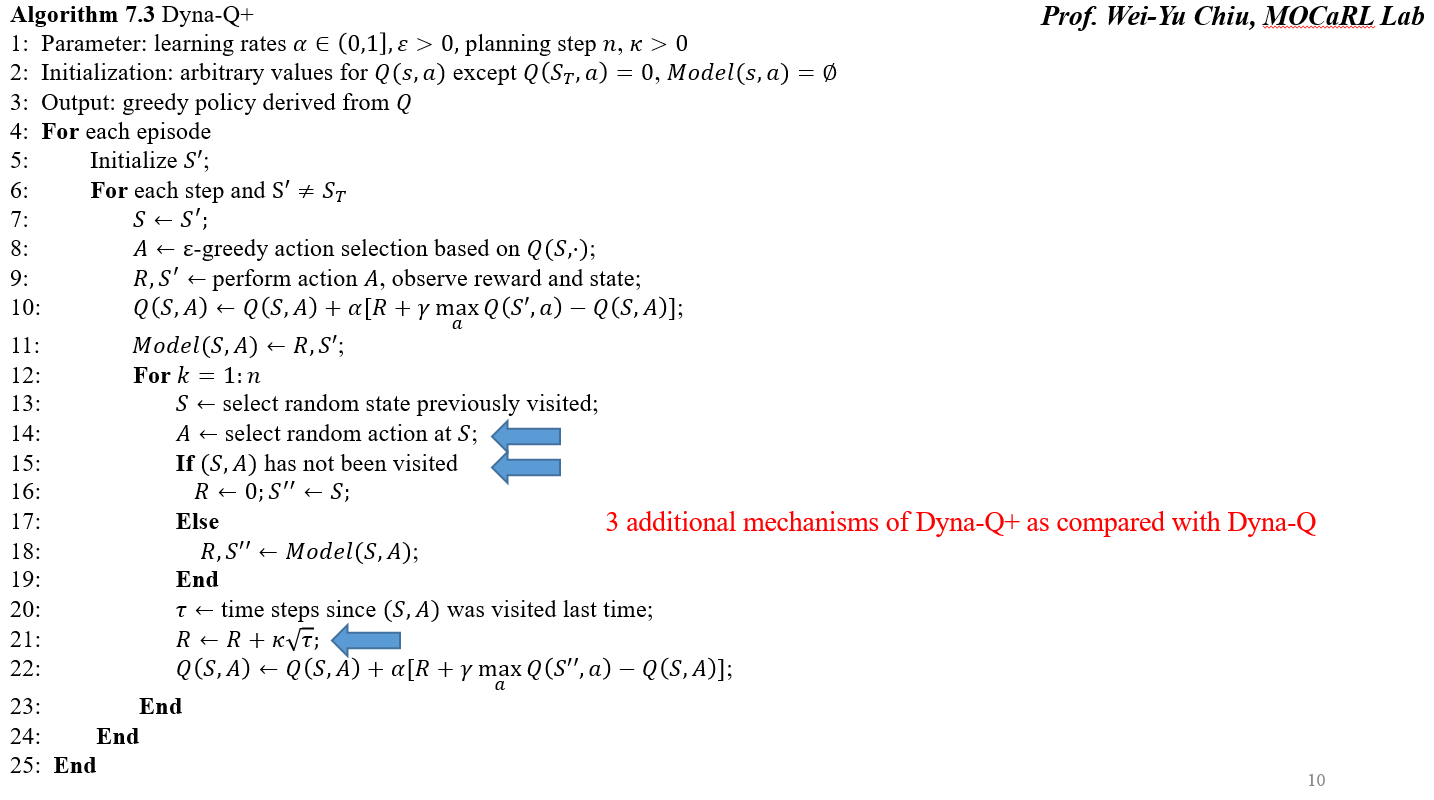

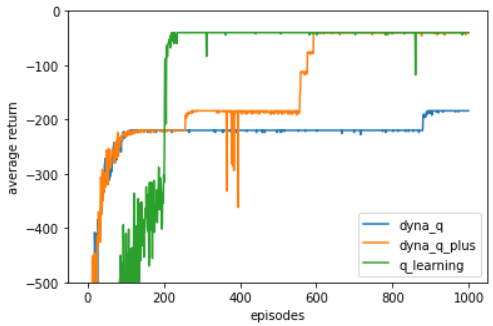

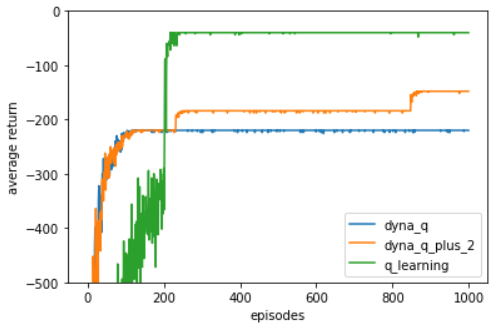![image.png]()

如果將t每次episode都進行更新，則當環境變化後，下面少了一塊障礙，而其t-table值在訓練一段時間之後，幾乎沒有更新，當她發現新的路之後，τ會突然變很大，因為model的關係，Q值收斂較快，所以環境沒有變化以前，最後一次拜訪這個動作與位置應該已經很久以前了，所以當環境在兩百episode之後，R的更新會受到τ差距很大而導致R變化很快，Q-table的更新對於向下走的值將會變得很快，所以第一張圖片(restart in simulation)的收斂速度一定比第二張圖片來的快，可以從上下兩張圖片比較得知。

#Result(60%)
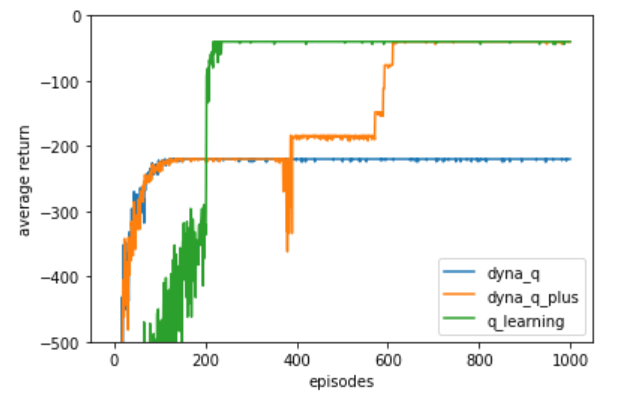

dyna_q
dyna_q_plus
q_learning


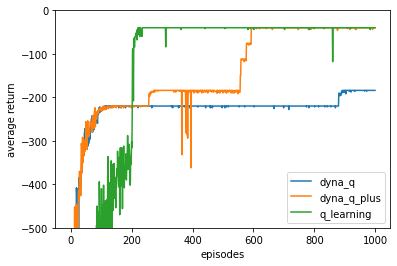

In [10]:
simulation = 5
plt.plot(np.average([dyna_q() for i in range(simulation )],axis=0),label='dyna_q')
print('dyna_q')
plt.plot(np.average([dyna_q_plus() for i in range(simulation )],axis=0),label='dyna_q_plus')
print('dyna_q_plus')
plt.plot(np.average([q_learning() for i in range(simulation )],axis=0),label='q_learning')
print('q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

dyna_q
dyna_q_plus_2
q_learning


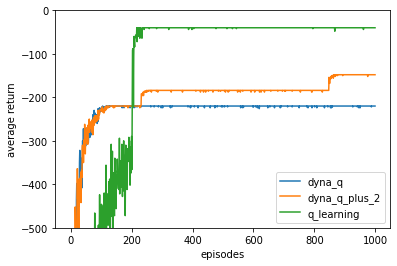

In [19]:
simulation = 5
plt.plot(np.average([dyna_q() for i in range(simulation )],axis=0),label='dyna_q')
print('dyna_q')
plt.plot(np.average([dyna_q_plus_2() for i in range(simulation )],axis=0),label='dyna_q_plus_2')
print('dyna_q_plus_2')
plt.plot(np.average([q_learning() for i in range(simulation )],axis=0),label='q_learning')
print('q_learning')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

# Question 1(20%)
Why Q-learning can react instantly when environment change?

根據測試，會發現在前兩百次模型訓練尚未完成，所以環境變化後，他就會發現最短路徑，如果將環境變化拉到九百次後，會發現，他就很難發現新的路徑，因為Q-TABLE已經收斂完成,只能依靠greedy action剛好在第一個位置選擇向下的位置來發現有向下走的方式，但這樣的機率會很小，因為epsilon只有0.001。

#Useful tool

In [ ]:
from collections import defaultdict
import numpy as np
model0 = {} #dictionary
model0[5] = 1 #key:5 value:1
print("corresponding value at key 5", model0[5])
model = defaultdict(dict)


model[(0,1)][1] = [-1,(1,2)] #when key (0,1) is empty, model[(0,1)] will be dictionary, can represent s, a, r, s_
model[(0,1)][2] = [-1,(1,3)]
model[(1,1)][3] = [-1,(0,1)]
model[(1,1)][4] = [-1,(0,5)]
print("key in model:", list(model))
print(model)
print("How many element in model:",len(model))
_ = np.random.permutation(list(model))
print("Permutation key of dict:",_)
s = _[0]
print("Random select one key:",s)
print("value in key:",model[tuple(s)])
print("Actions in model[tuple(s)]:",list(model[tuple(s)]))
a = list(model[tuple(s)])[0]

print("reward and next state in model[tuple(s)][a]:",model[tuple(s)][a])
print(rd.randint(len(list(model))))

print(list(model[0,1].keys()))


corresponding value at key 5 1
key in model: [(0, 1), (1, 1)]
defaultdict(<class 'dict'>, {(0, 1): {1: [-1, (1, 2)], 2: [-1, (1, 3)]}, (1, 1): {3: [-1, (0, 1)], 4: [-1, (0, 5)]}})
How many element in model: 2
Permutation key of dict: [[0 1]
 [1 1]]
Random select one key: [0 1]
value in key: {1: [-1, (1, 2)], 2: [-1, (1, 3)]}
Actions in model[tuple(s)]: [1, 2]
reward and next state in model[tuple(s)][a]: [-1, (1, 2)]
1
[1, 2]
